# **Интерфейсы, имплементация и полиморфизм**

Универсальная последовательная шина (USB) обеспечивает стандартный интерфейс для подключения широкого спектра
устройств к компьютерам. Как вы, вероятно, знаете, стандартный USB-кабель позволяет подключать
компьютер к цифровым камерам, смартфонам, принтерам, сканерам, внешним дискам хранения данных и
многим другим устройствам. Обычная флешка поставляется со встроенным разъемом USB.

Интерфейсы так же распространены в программном обеспечении, как и в аппаратном обеспечении. Одним из отличительных признаков
хорошо разработанного программного обеспечения является четкое разделение интерфейсов и реализаций. Когда
программисты используют программный ресурс, им нужно интересоваться только его интерфейсом —
набором доступных им методов, функций и названий типов данных. В идеале, подробностями
реализации этого ресурса — лежащим в основе алгоритмическим кодом и структурами данных—
лежат скрытые или инкапсулированные в пределах абстрактного барьера.

Барьер, отделяющий
интерфейс от реализации:

*   Упрощает процесс обучения пользователей ресурса

*   Позволяет пользователям быстро соединять ресурсы по принципу "подключи и работай"
*   Может предоставить пользователям возможность выбирать между альтернативными реализациями одного и того
же ресурса

*   Позволяет разработчикам вносить изменения в реализацию ресурса, не
нарушая код его пользователей



## **Разработка интерфейса**

Каждый раз, когда вы запускаете справочную функцию Python для получения информации о модуле, типе данных,
методе или функции, вы получаете доступ к документации об интерфейсе этого ресурса. В
случае типов данных (или классов) вы видите список заголовков методов, которые включают их
имена, типы их аргументов, описание того, что делают методы, и значения
, возвращаемые методами, если таковые имеются. Документация дает вам достаточно информации, чтобы знать, как
использовать или вызывать метод и чего ожидать от его выполнения и возврата. Это оно. Интерфейсы
они лаконичны и информативны, позволяя вам понять поведение ресурса, просто
взглянув на его общедоступное внешнее “лицо”.

В этом разделе будет разработан интерфейс для простого типа коллекции, называемого bag. Как
упоминалось в раннем обзоре коллекций (глава 2, “Обзор коллекций”),
пакет - это тип неупорядоченной коллекции. Интерфейс bag позволяет клиентам эффективно использовать пакеты
и позволяет разработчикам создавать новые классы, реализующие этот интерфейс.

### **Разработка интерфейса бага**

Методы в интерфейсе ресурса выражают поведение этого ресурса, виды действий
, которые он выполняет, или то, что вы можете с ним сделать. В случае с таким новым типом объектов, как сумка,
вы можете создать интерфейс, подумав о том, что сумки могут делать в реальной ситуации.

Indeed, in the use of common names for operations on different types of collections, you
see the first example of polymorphism (from the Greek term for many bodies) in action.
Following are the function names, method names, and operators in the bag interface:

```
 add
 clear
 count
 for …
 in
 isEmpty
 len
 remove
 str
 +
 ==
```



## **Указание аргументов и возвращаемых значений**

Следующим усовершенствованием интерфейса bag является добавление аргументов к операциям в интерфейсе и обдумывание того, какие значения, если таковые имеются, они возвращают. Обратите внимание, что интерфейс никогда не раскрывает, как операция выполняет свою задачу; это работа его разработчиков.
Еще раз, вы можете вернуться к сценарию использования пакетов в реальной жизни.

Для каждой операции
спрашивайте, какие объекты, если таковые имеются, ей нужны от вас для выполнения своей задачи, и какие объекты, если таковые имеются,
возвращаются вам по завершении задачи. Эта информация дает вам информацию о ходе операции
аргументы и возвращаемые значения, если таковые имеются. Быстрый способ разобраться в этих вопросах - представить
себе написание короткой программы, использующей набор чисел. Следующий фрагмент кода иллюстрирует такую
мечту, где переменные b и c относятся к багам:

In [3]:
b = [1, 2, 3]
b.clear() # Make the bag empty
for item in range(10): # Add 10 numbers to it
    b.append(item)
print(b) # Print the contents (a string)
print(4 in b) # Is 4 in the bag?
print(b.count(2)) # 1 instance of 2 in the bag
c = b + b # Contents replicated in a new bag
print(len(c)) # 20 numbers
for item in c: # Print them all individually
    print(item)
for item in range(10): # Remove half of them
    c.remove(item)
print(c == b) # Should be the same contents now

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
True
1
20
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
True


Операции isEmpty, len и clear являются самыми простыми, потому что каждая из них не требует
от нас никакой информации для выполнения своей работы. len возвращает целое число, тогда как str возвращает строку.

Операции добавления и удаления должны знать добавляемый или удаляемый элемент, поэтому каждая
ожидает один аргумент: элемент. Один из вопросов, который теперь возникает, заключается в том, что должен делать remove
, когда его аргумента нет в пакете. Когда это происходит со встроенными коллекциями Python,
Python обычно генерирует исключение. Вы можете пока проигнорировать эту проблему и вернуться к ней
в следующем подразделе.

Операторы in, + и == ожидают два операнда, и каждый оператор возвращает одно
значение. Двумя операндами оператора in являются любой объект Python и пакет.

Оператор in
возвращает логическое значение. Оператор + ожидает два пакета в качестве операндов и возвращает
третий пакет. Оператор == ожидает пакет и любой объект Python в качестве операндов и возвращает
логическое значение.

Цикл for над коллекцией - это то, что программисты называют “синтаксическим сахаром” для более
сложного цикла, использующего объект iterator. В этой главе итераторы рассматриваются более подробно
подробности позже. А пока просто предположим, что эта часть интерфейса bag полагается на метод
с именем __iter__.

Как упоминалось ранее в этой книге, некоторые функции Python и символы операторов являются
сокращениями для определенных стандартных методов в реализующем классе. Таблица 5-1 добавляет эти
методы к списку в предыдущем разделе “Проектирование интерфейса Bag” вместе с
соответствующими аргументами. Обратите внимание, что b в столбце 1 относится к пакету, а self в столбце 2
относится к объекту (пакету), на котором выполняется метод. Обратите также внимание, что вы можете опустить метод
__contains__, если вы включаете метод __iter__.

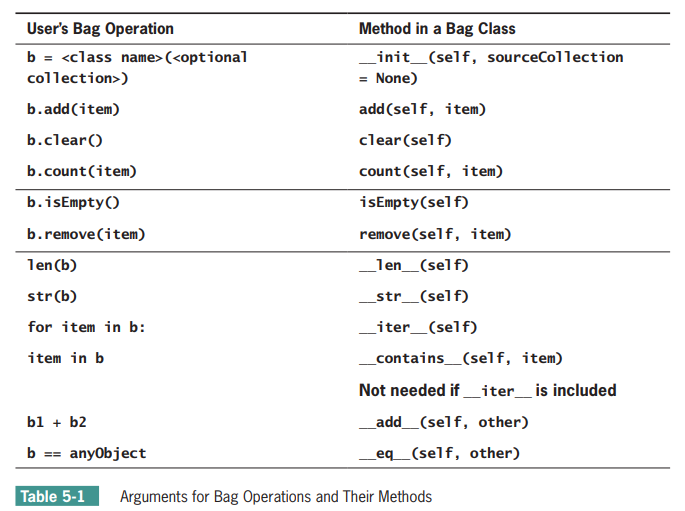

## **Конструкторы и имплементирующие классы**

В первой строке таблицы 5-1 показана операция, не названная и не включенная в предыдущий список. Эта
операция является конструктором для создаваемого пакета определенного типа. Для пользователя
bag этот конструктор является просто именем реализующего класса bag, за которым следуют его аргументы, если таковые имеются. Синтаксическая форма <имя класса> используется в таблице 5-1, чтобы указать, что это
может быть имя любого реализующего класса bag. Метод в правом столбце всегда
с именем __init__. Обратите внимание, что этот метод принимает необязательную исходную коллекцию в качестве аргумента, значение которого по умолчанию равно None, если пользователь его не предоставляет. Это позволяет пользователю создать
либо пустой пакет, либо пакет с содержимым другой коллекции.

Например, предположим, что программисту доступны два реализующих класса, ArrayBag и LinkedBag
. Следующий сегмент кода создает пустой связанный пакет и
пакет массива, содержащий числа из заданного списка:

## **Предварительные условия, постусловия, исключения и документация**

Последним шагом перед выражением интерфейса в коде является четкое и сжатое описание
того, что делает каждый метод. Это описание включает в себя не только то, что, как вы ожидаете, произойдет в
нормальных условиях при вызове метода, но и то, что произойдет, когда произойдет что-то
ненормальное, например ошибка. Такие описания кратки и касаются только того, что
делает метод, а не того, как он это делает. Они формируют основу для документирования закодированного
интерфейса с помощью docstrings, как вы вскоре увидите.

Как обсуждалось в главе 1 “Основы программирования на Python”, строка документа - это строка, заключенная в
в тройных кавычках, которые будут отображаться при запуске справочной функции Python для ресурса. Строка
документации для метода без возможных условий ошибки просто указывает, каковы параметры метода
, каково его возвращаемое значение и какое действие выполняется. Иногда вы можете
выразить эту информацию в одном предложении, например, “Возвращает сумму чисел в
списке” или “Сортирует элементы списка в порядке возрастания”.
Более подробная форма документации может включать предварительные и постусловия.

Например, метод удаления пакета может вызвать ошибку ключа, если целевого элемента нет в пакете.
Теперь вы увидите, что делает метод удаления пакета при нормальных или ненормальных обстоятельствах. Вот заголовок метода Python для этой операции, который включает подробную
строку документации, описывающую аргумент метода, предварительные условия, постусловия и
возможные исключения. Обратите внимание, что self - это имя объекта bag с точки
зрения метода.

In [5]:
def remove(self, item):
    """Precondition: item is in self.
    Raises: KeyError if item is not in self.
    Postcondition: item is removed from self."""

## **Программируем интерфейс на Питоне**

Некоторые языки, такие как Java, предоставляют синтаксис для кодирования интерфейса. Интерфейс Java
не выполняет никаких действий сам по себе, но предоставляет шаблон методов, которому должны соответствовать реализующие классы. В Python такой функции нет, но вы можете эмулировать ее в целях
документирования и руководства разработкой реализующих классов. Хотя вы
никогда не будете использовать этот псевдоинтерфейс в реальном приложении, он может служить полезной схемой для
определения операций и обеспечения согласованности между их реализациями.

Чтобы создать интерфейс, перечислите заголовки каждого метода с его документацией и завершите каждый метод одним оператором pass или return. Оператор pass используется в
методах-мутаторах, которые не возвращают значения, тогда как каждый метод доступа возвращает простое
значение по умолчанию, такое как False, 0 или None. Чтобы заголовки методов можно было проверить с
помощью компилятора, поместите их в класс, суффикс которого равен “Interface”. Вот список интерфейса bag
, как определено в классе BagInterface:

In [7]:
class BagInterface(object):
    """Interface for all bag types."""

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it’s present."""
        pass

    # Accessor methods
    def isEmpty(self):
        """Returns True if len(self) == 0,
        or False otherwise."""
        return True

    def __len__(self):
        """Returns the number of items in self."""
        return 0

    def __str__(self):
        """Returns the string representation of self."""
        return ""

    def __iter__(self):
        """Supports iteration over a view of self."""
        return None

    def __add__(self, other):
        """Returns a new bag containing the contents
        of self and other."""
        return None

    def __eq__(self, other):
        """Returns True if self equals other,
        or False otherwise."""
        return False

    def count(self, item):
        """Returns the number of instances of item in self."""
        return 0

    # Mutator methods
    def clear(self):
        """Makes self become empty."""
        pass

    def add(self, item):
        """Adds item to self."""
        pass

    def remove(self, item):
        """Precondition: item is in self.
        Raises: KeyError if item in not in self.
        Postcondition: item is removed from self."""
        pass

Теперь, когда есть удобная схема для всех сумок, вы готовы рассмотреть некоторые
варианты реализации сумок. В следующих двух разделах вы разрабатываете коллекцию сумок на основе массива и коллекцию сумок на
основе ссылок.

## **Разработка реализации на основе массива**

В этом разделе вы разрабатываете реализацию интерфейса bag на основе массива, называемую ArrayBag.

После того, как разработчик класса collection получил его интерфейс, проектирование и реализация самого класса состоит из двух этапов:



1.   Выберите подходящую структуру данных, содержащую элементы коллекции, и определите любые другие данные, которые могут потребоваться для представления состояния коллекции.
Эти данные присваиваются переменным экземпляра в методе __init__.

2.   Заполните код для методов, указанных в интерфейсе.

## **Выбор и инициализация структуры данных**

Код для этой части дизайна создать легко. Вы просто создаете копию
файла интерфейса bag, baginterface.py, и переименовываете его в arraybag.py. Затем вы добавляете
инструкцию import для массива, переименовываете класс в ArrayBag, добавляете переменную класса для
емкости по умолчанию и выполняете метод __init__. Вот снимок этих изменений:

In [ ]:
"""
File: arrays.py
An Array is like a list, but the client can use
only [], len, iter, and str.
To instantiate, use
<variable> = Array(<capacity>, <optional fill value>)
The fill value is None by default.
"""

class Array(object):
    """Represents an array."""

    def __init__(self, capacity, fillValue = None):
        """Capacity is the static size of the array.
        fillValue is placed at each position."""
        self.items = list()
        for count in range(capacity):
            self.items.append(fillValue)

    def __len__(self):
        """-> The capacity of the array."""
        return len(self.items)

    def __str__(self):
        """-> The string representation of the array."""
        return str(self.items)

    def __iter__(self):
        """Supports traversal with a for loop."""
        return iter(self.items)

    def __getitem__(self, index):
        """Subscript operator for access at index."""
        return self.items[index]

    def __setitem__(self, index, newItem):
        """Subscript operator for replacement at index."""
        self.items[index] = newItem

In [12]:
class ArrayBag(object):
    """An array-based bag implementation."""

    # Class variable
    DEFAULT_CAPACITY = 10

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it’s present."""
        self.items = Array(ArrayBag.DEFAULT_CAPACITY)
        self.size = 0
        if sourceCollection:
            for item in sourceCollection:
                self.add(item)

    # Accessor methods
    def isEmpty(self):
        """Returns True if len(self) == 0, or False otherwise."""
        return len(self) == 0

    def __len__(self):
        """Returns the number of items in self."""
        return self.size

    # Mutator methods
    def clear(self):
        """Makes self become empty."""
        self.size = 0
        self.items = Array(ArrayBag.DEFAULT_CAPACITY)

    def add(self, item):
        """Adds item to self."""
        # Check array memory here and increase it if necessary
        self.items[len(self)] = item
        self.size += 1

    def __iter__(self):
        """Supports iteration over a view of self."""
        cursor = 0
        while cursor < len(self):
            yield self.items[cursor]
            cursor += 1

    def __str__(self):
        """Returns the string representation of self."""
        return "{" + ", ".join(map(str, self)) + "}"

    def __add__(self, other):
        """Returns a new bag containing the contents
        of self and other."""
        result = ArrayBag(self)
        for item in other:
            result.add(item)
        return result

    def __eq__(self, other):
        """Returns True if self equals other,
        or False otherwise."""
        if self is other: return True
        if type(self) != type(other) or \
            len(self) != len(other):
            return False
        for item in self:
            if self.count(item) != other.count(item):
                return False
        return True

    def remove(self, item):
        """Precondition: item is in self.
        Raises: KeyError if item in not in self.
        postcondition: item is removed from self."""
        # 1. check precondition and raise an exception if necessary
        if not item in self:
            raise KeyError(str(item) + " not in bag")
        # 2. Search for index of target item
        targetIndex = 0
        for targetItem in self:
            if targetItem == item:
                break
            targetIndex += 1
        # 3. Shift items to the right of target left by one position
        for i in range(targetIndex, len(self) - 1):
            self.items[i] = self.items[i + 1]
        # 4. Decrement logical size
        self.size -= 1
        # 5. Check array memory here and decrease it if necessary

Теперь необходимо загрузить этот модуль и создать экземпляр ArrayBag. Но пока
вы не выполните некоторые другие методы, вы не сможете просматривать или изменять его содержимое.

## **Инициализация структуры данных**

In [13]:
class Node(object):
    """Represents a singly linked node."""

    def __init__(self, data, next = None):
        """Instantiates a Node with a default next of None."""
        self.data = data
        self.next = next

Как и в классе ArrayBag, роль метода __init__ в LinkedBag заключается в создании
переменных экземпляра и присвоении им начальных значений. В этом случае вместо массива и логического
размера двумя фрагментами данных являются связанная структура и логический размер. Для поддержания согласованности
вы можете использовать те же имена переменных, что и раньше. Однако self.items теперь является внешним
указателем вместо массива. Этот указатель изначально имеет значение None, состояние пустой связанной
структуры. Когда структура не пуста, self.items ссылается на первый узел в связанной
структуре.

Код для копирования элементов из исходной коллекции в новый пакет такой же, как и раньше
(потому что вы, конечно, используете цикл for с вызовом метода).
Модуль linked bag теперь импортирует односвязный тип узла для представления узлов. Переменная
класса для емкости по умолчанию опущена, поскольку она не имеет значения в связанной реализации. Вот код для этих изменений:

In [15]:
class LinkedBag(object):
    """A link-based bag implementation."""
    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it’s present."""
        self.items = None
        self.size = 0
        if sourceCollection:
            for item in sourceCollection:
                self.add(item)

    def __iter__(self):
        """Supports iteration over a view of self."""
        cursor = self.items
        while cursor != None:
            yield cursor.data
            cursor = cursor.next

def remove(self, item):
    """Precondition: item is in self.
    Raises: KeyError if item is not in self.
    Postcondition: item is removed from self."""

    # Check precondition and raise an exception if necessary
    if not item in self:
        raise KeyError(str(item) + " not in bag")

    # Search for the node containing the target item
    # probe will point to the target node, and trailer
    # will point to the node before it, if it exists
    probe = self.items
    trailer = None
    for targetItem in self:
        if targetItem == item:
            break
        trailer = probe
        probe = probe.next

    # Unhook the node to be deleted, either the first one or
    # one thereafter
    if probe == self.items:
        self.items = self.items.next
    else:
        trailer.next = probe.next

    # Decrement logical size
    self.size -= 1

## **Тестирование двух реализаций пакета**

Важной частью разработки программного ресурса является тестирование. В
описании разработки программы в этой главе указано, что вы можете запускать код по ходу работы, чтобы опробовать возможности каждой части. Такого рода тестирование подходит для черновой проработки ресурса и доработки
его реализации. Но как только код будет завершен, вы должны выполнить тщательный тест, чтобы
убедиться, что ресурс соответствует его требованиям.
Модульное тестирование с помощью таких инструментов, как pyunit, может обеспечить такое

Чтобы проиллюстрировать использование функции тестирования для ваших классов bag, вот код для автономного приложения, которое вы можете запустить с любым классом bag. Функция main ожидает тип в качестве
аргумента и запускает тесты для объектов этого типа.

In [21]:
def test(bagType):
    """Expects a bag type as an argument and runs some tests
    on objects of that type."""
    print("Testing", bagType)
    lyst = [2013, 61, 1973]
    print("The list of items added is:", lyst)
    b1 = []
    print("Length, expect 3:", len(b1))
    print("Expect the bag’s string:", b1)
    print("2013 in bag, expect True:", 2013 in b1)
    print("2012 in bag, expect False:", 2012 in b1)
    print("Expect the items on separate lines:")
    for item in b1:
        print(item)

    b1.clear()
    print("Clearing the bag, expect {}:", b1)
    b1.append(25)
    b1.remove(25)
    print("Adding and then removing 25, expect {}:", b1)
    b1 = []
    b2 = b1
    print("Cloning the bag, expect True for ==:", b1 == b2)
    print("Expect False for is:", b1 is b2)
    print("+ the two bags, expect two of each item:", b1 + b2)
    # for item in lyst:
    #     b1.remove(item)

    print("Remove all items, expect {}:", b1)
    print("Removing nonexistent item, expect crash with KeyError:")
    # b2.remove(99)
test(ArrayBag)
# test(LinkedBag)

Testing <class '__main__.ArrayBag'>
The list of items added is: [2013, 61, 1973]
Length, expect 3: 0
Expect the bag’s string: []
2013 in bag, expect True: False
2012 in bag, expect False: False
Expect the items on separate lines:
Clearing the bag, expect {}: []
Adding and then removing 25, expect {}: []
Cloning the bag, expect True for ==: True
Expect False for is: True
+ the two bags, expect two of each item: []
Remove all items, expect {}: []
Removing nonexistent item, expect crash with KeyError:


## **Построение диаграммы ресурса Bag с помощью UML**

По мере добавления новых ресурсов в свой программный набор инструментов их будет легче каталогизировать с помощью набора
наглядных пособий, называемых диаграммами классов. Эти диаграммы взяты из визуального языка, называемого
Унифицированный язык моделирования (UML). Диаграммы классов показывают взаимосвязи между классами
на различных уровнях детализации. Основным отношением, касающимся вас в настоящей главе
, было отношение класса, реализующего интерфейс. Фактически, теперь у вас есть два
класса, реализующих один и тот же интерфейс, как показано на диаграмме классов на рисунке 5-1.

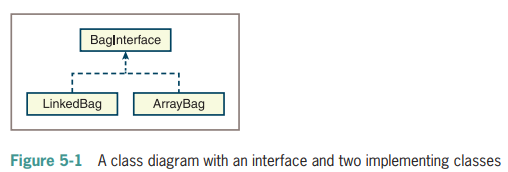

Двумя другими важными отношениями между классами являются агрегация и композиция. Каждый
Объект LinkedBag объединяет ноль или более узлов, тогда как каждый объект ArrayBag состоит из одного объекта Array. Рисунок 5-2 добавляет эти связи к ресурсам, изображенным
на рисунке 5.1. Обратите внимание, что символ * на рисунке 5-2 указывает на ноль или более экземпляров класса
Node в агрегации.

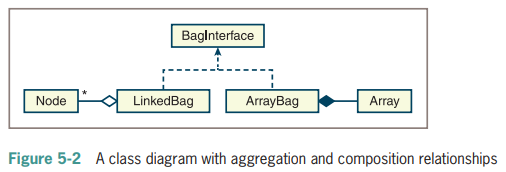

Неофициально можно рассматривать композицию как отношение "целое-часть", в то время как агрегация - это отношение "один-ко-многим". Следующая глава знакомит с другим важным отношением - наследованием.